# Naive Bayes

One of the **simplest** yet effective algorithm that should be tried to solve the classification problem is Naive Bayes Algorithm. It’s a probabilistic modell which is based on the Bayes’ theorem which is an equation describing the **relationship of conditional probabilities of statistical quantities**.

The Naive Bayes algorithm has **hardly any hyperparameters** and is recommended to use first in the event of classification problems. If this does not give satisfactory results, then more complex algorithms should be used.

## Conditional Probability

The probability of $A$ **given we already know** that $B$ has occured, is defined as

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

Only the _portion_ of $A$ that is contained in $B$ could occur, hence the original probability of $A \cap B$ must be recalculated (or **scaled**) to reflect the fact that the _new_ sample space is $B$.

In a slightly redundandt way, the conditional probability can also be written as

$$
P(A|B) = P(A \cap B\,|B)
$$

which makes it easier to see how we calculate the probability for an event $A$: Writing $P(A \cap B\,|B)$ makes it obvious that we want the probability that an event $A \cap B$ happens, **scaled by the knowledge we already have** about the event $B$:

$$
P({\color{orange}{A \cap B}}\,|{\color{purple}B}) = \frac{P({\color{orange}{A \cap B}})}{P({\color{purple}B})}
$$

## Bayes Theorem

See also [Bayes' Theorem with Lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego).

Bayes theorem describes the probability of an event, based on **prior knowledge** that might be related to the event. For example, if the risk of health problems is known to increase with age, Bayes theorem allows the risk to an individual of a known age to be assessed more accurately than simply assuming that the individual is typical of the population as a whole.

$$
\begin{aligned}
P(A|B) &= \frac{P(B|A) \cdot P(A)}{P(B)} \\[10pt]
\text{Posterior} &= \, \frac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}
\end{aligned}
$$

with

* the conditional probability $P(A|B)$ of event $A$ occurring given that $B$ is true. This is also called **posterior probability**.
* the conditional probability $P(B|A)$ of event $B$ occurring given that $A$ is true. This is also called the **likelyhood**.
* the probability $P(A)$. This is also called the **prior probability**.
* the probability $P(B)$. This is also called the **evidence** which **normalizes** our probabilities.

If we are only interested in **proportions** of conditional probabilities, we can also write

$$
\begin{aligned}
P(A|B) &\propto P(B|A) \cdot P(A) \\[10pt]
\text{Posterior} &\propto \, \text{Likelihood} \cdot \text{Prior}
\end{aligned}
$$

### Alternative Form

Another form of Bayes theorem for **two competing statements** or hypotheses is

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)}
$$

For proposition $A$ and evidence or background $B$,

* $P(A)$ is the prior probability, the initial degree of belief in $A$.
* $P(\neg A)$ is the corresponding initial degree of belief in not $A$, that $A$ is false, where $P(\neg A) = 1 - P(A)$
* $P(B|A)$ is the conditional probability or likelihood, the degree of belief in $B$ given that proposition $A$ is true.
* $P(B|\neg A)$ is the conditional probability or likelihood, the degree of belief in $B$ given that proposition $A$ is false.
* $P(A|B)$ is the posterior probability, the probability of $A$ after taking into account $B$.

### Example

#### Problem

Knowing a medical test having a **99% accuracy** (for true positives and true negatives). Already knowing that **1 out of 10000 people are sick**, what is the probability of an individual being sick, given that this individual got a positive test result?

#### Solution

![false-positives](images/bayes-theorem.svg)

What we knew before we knew the test is positive, is the **prior probability** $P(sick) = 0.0001$ and $P(healthy) = 0.9999$. 

As only the **positive tests** actually occured, we scale the likelyhood and the prior with the **evidence** $P(positive)$:

$$
\begin{align}
P(positive) &= P(sick) \cdot P(positive|sick) + P(healthy) \cdot P(positive|healthy) \\[10pt]
&= P(sick) \cdot \text{Sensitivity} + (1 - P(sick)) \cdot (1 - \text{Specificity})
\end{align}
$$

In [15]:
# P(sick)
p_sick = 0.0001

# P(~sick) or P(healthy)
p_healthy = 1 - p_sick

# Sensitivity or P(positive|sick)
p_positive_sick = 0.99

# Specificity or P(positive|healthy)
p_positive_healthy = 1 - p_positive_sick

# P(positive)
p_positive = (p_sick * p_positive_sick) + (p_healthy * p_positive_healthy)

print(f'The probability of getting a positive test result P(positive) is: {p_positive:.4f}')

The probability of getting a positive test result P(positive) is: 0.0101


The **posterior probability**, what we infered after we knew that the test is positive, is:

$$
\begin{align}
P(sick|positive) &= \frac{P(sick) \cdot P(positive|sick)}{P(positive)} \\[10pt]
&= \frac{P(sick) \cdot P(positive|sick)}{P(sick) \cdot P(positive|sick) + P(healthy) \cdot P(positive|healthy)} \\[10pt]
&= \frac{0.0001 \cdot 0.99}{0.0001 \cdot 0.99 + 0.9999 \cdot 0.01} \\[10pt]
&= 0.0098 \approx 1 \%
\end{align}
$$

In [19]:
p_sick_positive = p_sick * p_positive_sick / p_positive
print(f'The posterior probability of being sick having a positive test result is: {p_sick_positive:.4f}')

p_healthy_positive = p_healthy * p_positive_healthy / p_positive
print(f'The posterior probability of being healthy having a positive test result is: {p_healthy_positive:.4f}')

The posterior probability of being sick having a positive test result is: 0.0098
The posterior probability of being healthy having a positive test result is: 0.9902


The sum of our posteriors will always equal `1`.

In [20]:
print(f'{(p_sick_positive + p_healthy_positive):.4f}')

1.0000


## Naive Bayes

Lets consider a spam classifier with a **class variable** $y$ ($spam=1$, $ham=0$) and **feature vectors** $x_1, \dots, x_n$ (the individual words of a message).

The probability of a message being spam or ham given the words $x_1, \dots, x_n$ calculates then:

$$
P(y \, | \, x_1, \dots, x_n) = \frac{P(x_1, \dots, x_n \, | \, y) \cdot P(y)}{P(x_1, \dots, x_n)}
$$

or 

$$
P(y \, | \, x_1, \dots, x_n) \propto P(x_1, \dots, x_n \, | \, y) \cdot P(y)
$$

with

$$
\begin{align}
P(x_1, \dots, x_n \, | \, y) &= P(x_1 \cap x_2 \cap \ldots \cap x_n \, | \, y) \\
&= P(x_1|y) \cdot P(x_2|y) \cdot \ldots \cdot P(x_n|y)
\end{align}
$$

Naive Bayes is considered **naive**, because it treats all words of a language as a **bag of words** regardless of the order or context of the words. Ignoring relationships among words has a **high bias**, but because it works well in practice, it has a **low variance**.

So, the **naive** bit of the theorem is when it considers each **feature** to be **independent** of each other which may not always be the case.

The probability that a word $x_i$ occurs in a spam message is the number $n_i$ of the words $x_i$ in all spam messages related to the total number of words $N$ of all spam messages. We add a value $\alpha$ to avoid having a probability of $0$ for a word:

$$
P(x_i|y) = \frac{n_i}{N} + \alpha
$$

Typically, we set $\alpha = 1$.



### Example

The initial guess that we observe a spam message $P(spam)$ is called a **prior probability**. This guess can be any probability we want, but a common guess is estimated from the training data.

Now we multiply the initial guess with the probabilities that the words $w_i$ occur in a normal message: $P(spam) \cdot P(w_i|spam) \cdot \ldots \cdot P(w_j|spam)$. These probabilities are derived from test-data.

This is proportional to the **probability that a message is spam** given the words $w_1, \dots, w_n$, hence can be considered as a **score**.

If we do the same for non-spam messages, we get two scores which tell us whether a message is spam or not.



## Naive Bayes in SciKit-Learn

In [21]:
from sklearn.naive_bayes import GaussianNB           # Gaussian Naive Bayes:    continuous value and are not discrete
from sklearn.naive_bayes import BernoulliNB          # Bernoulli Naive Bayes:   Multinomial Naive Bayes for boolean classes (e.g. spam/ham)
from sklearn.naive_bayes import MultinomialNB        # Multinomial Naive Bayes: probability of observing counts among a number of categories

### Naive Bayes Spam Classifier

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_table('data/sms.txt', header=None, names=['label', 'sms_message'])
df['label'] = df.label.map(({'ham': 0, 'spam': 1}))

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], random_state=1)

count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)    # fit the training data and then return the matrix
testing_data = count_vector.transform(X_test)          # transform testing data and return the matrix (we are not fitting the testing data)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

print(f'Accuracy score: {accuracy_score(y_test, predictions):.3f}')
print(f'Precision score: {precision_score(y_test, predictions):.3f}')
print(f'Recall score: {recall_score(y_test, predictions):.3f}')
print(f'F1 score: {f1_score(y_test, predictions):.3f}')

Accuracy score: 0.989
Precision score: 0.972
Recall score: 0.941
F1 score: 0.956


### Evaluating the Model

There are several evaluation metrics:

* **Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions.

For classification problems that are **skewed** in their **classification distributions**, for example if we had a 100 text messages and only 2 were spam, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. 

* **Precision** tells us what proportion of messages we classified as spam, actually were spam. 

It is the ratio 

$$
\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

* **Recall (Sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.

It is a ratio

$$
\frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

These two metrics can be combined to get the **F1 score**, which is weighted average of the precision and recall scores. This score can range from `0` to `1`, with `1` being the best possible **F1 score**.

In [26]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, predictions)
cfm

array([[1203,    5],
       [  11,  174]])

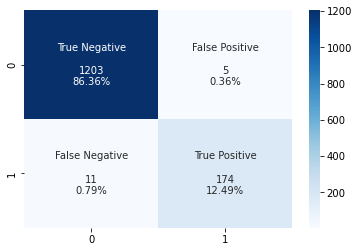

In [31]:
import seaborn as sns
import numpy as np

names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cfm.flatten() / np.sum(cfm)]
labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues');